In [123]:
locals().clear()
globals().clear()
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
import os
from PIL import Image
import cv2
import os
import cv2
import math
import numpy as np
import pandas as pd
from skimage import filters
import pandas as pd
from eval_metrics.seg_eval_metrics import IoU, dice_similarity
import json
import os

In [124]:

base_path = r'D:\test\BIOM5202_Project\Images\Raw Images\Dataset1\Set1'
file_name_substring_flair = 'flair.png'
file_name_substring_seg = 'seg.png'

All_images_flair = np.zeros((240, 240, 12), dtype=np.uint8)  # Changed dtype to np.uint8
All_images_seg = np.zeros((240, 240, 12), dtype=np.uint8)    # Changed dtype to np.uint8

for folder_number in range(1, 13):
    folder_path = os.path.join(base_path, str(folder_number))

    # Get a list of files in the folder
    files_flair = [file for file in os.listdir(folder_path) if file_name_substring_flair in file]
    files_seg = [file for file in os.listdir(folder_path) if file_name_substring_seg in file]

    # Check if any file contains the specified substring
    if files_flair and files_seg:
        file_path_flair = os.path.join(folder_path, files_flair[0])
        file_path_seg = os.path.join(folder_path, files_seg[0])

        # Open the image files using PIL
        img_flair = np.array(Image.open(file_path_flair), dtype=np.uint8)  # Changed dtype to np.uint8
        img_seg = np.array(Image.open(file_path_seg), dtype=np.uint8)      # Changed dtype to np.uint8

        # Convert the images to grayscale
        img_flair = cv2.cvtColor(img_flair, cv2.COLOR_BGR2GRAY)
        img_seg = cv2.cvtColor(img_seg, cv2.COLOR_BGR2GRAY)

        # Assign the images to the All_images arrays
        All_images_flair[:, :, folder_number - 1] = img_flair
        All_images_seg[:, :, folder_number - 1] = img_seg


In [125]:
from eval_metrics.seg_eval_metrics import (
    IoU,
    dice_similarity,
    extra_fraction,
    overlap_fraction,
    accuracy,
    specificity,
    root_mean_squared_error,
)

def compute_all_metrics(y_true, y_pred):
    eval_metrics = [
        ('IoU', IoU),
        ('Dice Similarity', dice_similarity),
        ('Extra Fraction', extra_fraction),
        ('Overlap Fraction', overlap_fraction),
        ('Accuracy', accuracy),
        ('Specificity', specificity),
        ('RMSE', root_mean_squared_error),
    ]
    
    results = {}
    for metric_name, metric_func in eval_metrics:
        results[metric_name] = metric_func(y_true, y_pred)
    
    return results

The thereshold using Ostu is equal: 205
The thereshold using maximum intensity-100 is equal: 24.48963541666666
The thereshold using Ostu is equal: 86


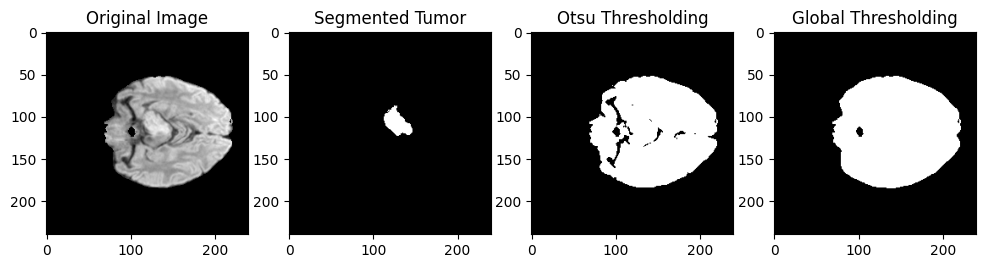

In [140]:
from skimage import filters
# Choose a slice and time point for demonstration
numberOflyer=1
image_slice = All_images_flair[:,:,numberOflyer]
segmented_image=All_images_seg[:,:,numberOflyer]

# Step 1: Get the pixel values
pixel_values = image_slice.flatten()
# Step 2: Remove pixel values between 0 and 20
pixel_values_Without_background = np.where((pixel_values >= 0) & (pixel_values <= 20), 255, pixel_values)


# Reshape the filtered pixel values back to the original image shape
image_filtered = pixel_values_Without_background.reshape(image_slice.shape)
T_ostu = threshold_otsu(image_filtered)
T_Brightest = np.max(image_filtered)-np.mean(image_filtered)


print("The thereshold using Ostu is equal:",T_ostu)
print("The thereshold using maximum intensity-100 is equal:",T_Brightest)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image_slice, (5, 5), 0)

# Otsu's thresholding
T_ostu = threshold_otsu(image_slice)
print("The thereshold using Ostu is equal:",T_ostu)
binary_mask_otsu = image_slice > T_ostu

# Simple global threshold (you can adjust this threshold value)
binary_mask_global = image_slice > T_Brightest


binary_mask_otsu = (image_slice > T_ostu).astype(np.uint8) * 255
binary_mask_global = (image_slice > binary_mask_global).astype(np.uint8) * 255

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1), plt.imshow(image_slice, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 4, 2), plt.imshow(segmented_image, cmap='gray'), plt.title('Segmented Tumor')
plt.subplot(1, 4, 3), plt.imshow(binary_mask_otsu, cmap='gray'), plt.title('Otsu Thresholding')
plt.subplot(1, 4, 4), plt.imshow(binary_mask_global, cmap='gray'), plt.title('Global Thresholding')

plt.show()

In [127]:

def draw_intersection_of_binary_images_v3(image1, image2):
    """
    Draw the intersection of two binary images, where intersection is red, non-intersection is white,
    and background is black.

    Parameters:
    image1, image2 (numpy.ndarray): Two binary images of the same size.

    Returns:
    numpy.ndarray: Image highlighting the intersection in red, non-intersection in white, and background in black.
    """
    if image1.shape != image2.shape:
        raise ValueError("The input images must have the same size")

    # Create an image to display the result
    result_image = np.zeros((image1.shape[0], image1.shape[1], 3), dtype=np.uint8)

    # Intersection (red)
    intersection = (image1 == 255) & (image2 == 255)
    result_image[intersection] = [255, 0, 0]

    # Non-intersecting parts of the images (white)
    non_intersection = ((image1 == 255) | (image2 == 255)) & ~intersection
    result_image[non_intersection] = [255, 255, 255]

    # Background remains black (as initialized)

    return result_image




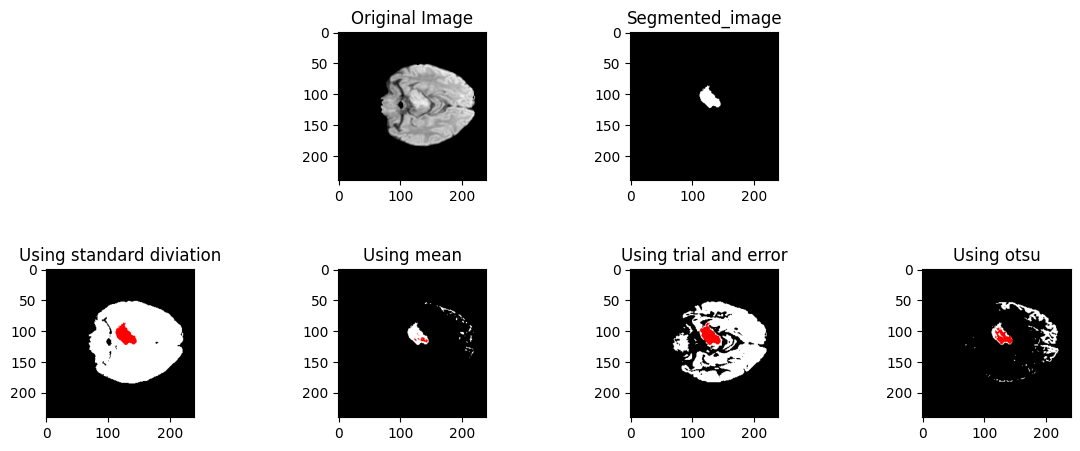

203
48.02039213098904
155
228.77328125
{'IoU': 0.04474873878005634, 'Dice Similarity': 0.08566411639282578, 'Extra Fraction': 21.34699853587116, 'Overlap Fraction': 1.0, 'Accuracy': 0.746875, 'Specificity': 0.7438375177890613, 'RMSE': 0.5031152949374527}
{'IoU': 0.05892924706772607, 'Dice Similarity': 0.11129968736042876, 'Extra Fraction': 14.478770131771595, 'Overlap Fraction': 0.9121522693997072, 'Accuracy': 0.8272743055555556, 'Specificity': 0.82625577595446, 'RMSE': 0.415602808513663}
{'IoU': 0.08008898776418243, 'Dice Similarity': 0.14830072090628219, 'Extra Fraction': 0.3162518301610542, 'Overlap Fraction': 0.1054172767203514, 'Accuracy': 0.9856423611111111, 'Specificity': 0.9962050002635416, 'RMSE': 0.11982336537123671}
{'IoU': 0.1687333923826395, 'Dice Similarity': 0.2887457370215991, 'Extra Fraction': 2.3060029282576866, 'Overlap Fraction': 0.5578330893118595, 'Accuracy': 0.9674131944444444, 'Specificity': 0.9723281269216578, 'RMSE': 0.18051815852028724}


In [141]:
# Assuming you have already defined 'image_slice' somewhere

# Step 1: Get the pixel values
blurred_image = cv2.GaussianBlur(image_slice, (5, 5), 0)
pixel_values = blurred_image.flatten()

# Step 2: Remove pixel values between 0 and 20
pixel_values_filtered = np.where((pixel_values >= 0) & (pixel_values <= 20), 255, pixel_values)

# Reshape the filtered pixel values back to the original image shape
image_filtered = pixel_values_filtered.reshape(image_slice.shape)

# Step 3: Apply Otsu's thresholding on the modified pixel values
T_ostu = filters.threshold_otsu(image_filtered)
T_Brightest_var = math.sqrt(np.var(image_filtered))
T_Brightest_trial = np.max(pixel_values_filtered)-100
T_Brightest_mean = np.mean(image_filtered)

binary_image_var= (image_slice > T_Brightest_var).astype(np.uint8) * 255
binary_image_trial = (image_slice > T_Brightest_trial).astype(np.uint8) * 255
binary_image_mean = (image_slice > T_Brightest_mean).astype(np.uint8) * 255
binary_image_ostu = (image_slice > T_ostu).astype(np.uint8) * 255

Diffrence_image_var=draw_intersection_of_binary_images_v3(binary_image_var,segmented_image)
Diffrence_image_mean=draw_intersection_of_binary_images_v3(binary_image_mean,segmented_image)
Diffrence_image_trial=draw_intersection_of_binary_images_v3(binary_image_trial,segmented_image)
Diffrence_image_ostu=draw_intersection_of_binary_images_v3(binary_image_ostu,segmented_image)



# Display the original, filtered, and thresholded images
plt.figure(figsize=(14, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust row and column spacing
plt.subplot(2, 4, 2)
plt.imshow(image_slice, cmap='gray')
plt.title('Original Image')


plt.subplot(2, 4, 3)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented_image')



plt.subplot(2, 4, 5)
plt.imshow(Diffrence_image_var)
plt.title('Using standard diviation')

plt.subplot(2, 4, 6)
plt.imshow(Diffrence_image_mean)
plt.title('Using mean')

plt.subplot(2, 4, 7)
plt.imshow(Diffrence_image_trial)
plt.title('Using trial and error')

plt.subplot(2, 4, 8)
plt.imshow(Diffrence_image_ostu)
plt.title('Using otsu')


plt.show()


binary_image_var= (image_slice > T_Brightest_var).astype(np.uint8) * 255
binary_image_trial = (image_slice > T_Brightest_trial).astype(np.uint8) * 255
binary_image_mean = (image_slice > T_Brightest_mean).astype(np.uint8) * 255
binary_image_ostu = (image_slice > T_ostu).astype(np.uint8) * 255

print(T_ostu)
print(T_Brightest_var)
print(T_Brightest_trial)
print(T_Brightest_mean)


a=segmented_image/255
binary_image_var= (image_slice > T_Brightest_var)
binary_image_trial = (image_slice > T_Brightest_trial)
binary_image_mean = (image_slice > T_Brightest_mean)
binary_image_ostu = (image_slice > T_ostu)
aa=compute_all_metrics(a,binary_image_var)
bb=compute_all_metrics(a,binary_image_trial)
cc=compute_all_metrics(a,binary_image_mean)
dd=compute_all_metrics(a,binary_image_ostu)
print(aa)
print(bb)
print(cc)
print(dd)


In [ ]:
# Assuming you have already defined 'All_images_flair', 'All_images_seg', and the draw_intersection_of_binary_images_v3 function

# Create a directory to save resulted images if it doesn't exist
os.makedirs('resulted_images', exist_ok=True)

# Choose a slice and time point for demonstration
for layer_index in range(All_images_flair.shape[2]):
    image_slice = All_images_flair[:, :, layer_index]
    segmented_image = All_images_seg[:, :, layer_index]

    # Step 1: Get the pixel values
    blurred_image = cv2.GaussianBlur(image_slice, (5, 5), 0)
    pixel_values = blurred_image.flatten()

    # Step 2: Remove pixel values between 0 and 20
    pixel_values_filtered = np.where((pixel_values >= 0) & (pixel_values <= 20), 255, pixel_values)

    # Reshape the filtered pixel values back to the original image shape
    image_filtered = pixel_values_filtered.reshape(image_slice.shape)

    # Step 3: Apply Otsu's thresholding on the modified pixel values
    T_ostu = filters.threshold_otsu(image_filtered)
    T_Brightest_var = math.sqrt(np.var(image_filtered))
    T_Brightest_trial = np.max(pixel_values_filtered) - 100
    T_Brightest_mean = np.mean(image_filtered)

    binary_image_var = (image_slice > T_Brightest_var).astype(np.uint8) * 255
    binary_image_trial = (image_slice > T_Brightest_trial).astype(np.uint8) * 255
    binary_image_mean = (image_slice > T_Brightest_mean).astype(np.uint8) * 255
    binary_image_ostu = (image_slice > T_ostu).astype(np.uint8) * 255

    Diffrence_image_var = draw_intersection_of_binary_images_v3(binary_image_var, segmented_image)
    Diffrence_image_mean = draw_intersection_of_binary_images_v3(binary_image_mean, segmented_image)
    Diffrence_image_trial = draw_intersection_of_binary_images_v3(binary_image_trial, segmented_image)
    Diffrence_image_ostu = draw_intersection_of_binary_images_v3(binary_image_ostu, segmented_image)

    # Display the original, filtered, and thresholded images
    plt.figure(figsize=(14, 5))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust row and column spacing

    plt.subplot(2, 4, 2)
    plt.imshow(image_slice, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 4, 3)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented_image')

    plt.subplot(2, 4, 5)
    plt.imshow(Diffrence_image_var)
    plt.title('Using standard diviation')

    plt.subplot(2, 4, 6)
    plt.imshow(Diffrence_image_mean)
    plt.title('Using mean')

    plt.subplot(2, 4, 7)
    plt.imshow(Diffrence_image_trial)
    plt.title('Using trial and error')

    plt.subplot(2, 4, 8)
    plt.imshow(Diffrence_image_ostu)
    plt.title('Using ostu')

    # Save the subplot image with the name of layer_index
    plt.savefig(os.path.join('resulted_images', f'binary_masks_folder_{layer_index}.png'))

    # Close the figure to avoid memory leaks
    plt.close()

In [ ]:
# Assuming you have the IoU and dice_similarity functions already defined

# Create a directory to save resulted images if it doesn't exist
os.makedirs('resulted_images', exist_ok=True)

all_metrics_var=[]
all_metrics_trial=[]
all_metrics_mean=[]
all_metrics_ostu=[]

# Choose a slice and time point for demonstration
for layer_index in range(All_images_flair.shape[2]):
    image_slice = All_images_flair[:, :, layer_index]
    segmented_image = All_images_seg[:, :, layer_index]
    segmented_image = segmented_image/255

    # Step 1: Get the pixel values
    blurred_image = cv2.GaussianBlur(image_slice, (5, 5), 0)
    pixel_values = blurred_image.flatten()

    # Step 2: Remove pixel values between 0 and 20
    pixel_values_filtered = np.where((pixel_values >= 0) & (pixel_values <= 20), 255, pixel_values)

    # Reshape the filtered pixel values back to the original image shape
    image_filtered = pixel_values_filtered.reshape(image_slice.shape)

    # Step 3: Apply Otsu's thresholding on the modified pixel values
    T_ostu = filters.threshold_otsu(image_filtered)
    T_Brightest_var = math.sqrt(np.var(image_filtered))
    T_Brightest_trial = np.max(pixel_values_filtered) - 100
    T_Brightest_mean = np.mean(image_filtered)

    
    binary_image_var = (image_slice > T_Brightest_var).astype(np.uint8)
    binary_image_trial = (image_slice > T_Brightest_trial).astype(np.uint8)
    binary_image_mean = (image_slice > T_Brightest_mean).astype(np.uint8)
    binary_image_ostu = (image_slice > T_ostu).astype(np.uint8)





    current_metrics_var = compute_all_metrics(segmented_image, binary_image_var)
    current_metrics_trial = compute_all_metrics(segmented_image, binary_image_trial)
    current_metrics_mean = compute_all_metrics(segmented_image, binary_image_mean)
    current_metrics_ostu = compute_all_metrics(segmented_image, binary_image_ostu)

    all_metrics_var.append(current_metrics_var)
    all_metrics_trial.append(current_metrics_trial)
    all_metrics_mean.append(current_metrics_mean)
    all_metrics_ostu.append(current_metrics_ostu)


In [ ]:
import pandas as pd

# Define the headers for both rows and columns
column_headers = ["IoU", "Dice Similarity", "Extra Fraction", "Overlap Fraction", "Accuracy", "Specificity", "RMSE"]
headers = ["standard Diviation", "Trial and Exam ", "Mean ", "Ostu "]

# Create an empty DataFrame with specified headers for rows and columns
df = pd.DataFrame(columns=column_headers, index=headers)

# Fill each cell with zero
df.loc[:, :] = 0

def process_metrics(all_metrics):
    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(all_metrics)
    
    # Calculate the mean for each column
    mean_values = df.mean()
    
    # Create a new DataFrame for the mean values
    mean_df = pd.DataFrame({'Metric': mean_values.index, 'Mean': mean_values.values})
    
    # Transpose the DataFrame
    mean_df = mean_df.T
    
    # Display the mean DataFrame
    return mean_df

# List of metric sets
metric_sets = [all_metrics_var, all_metrics_trial, all_metrics_mean, all_metrics_ostu]

# Process each set of metrics
i = 0
for metrics in metric_sets:
    mean_df = process_metrics(metrics)
    row_data = mean_df.loc["Mean"].values
    row_data = row_data.T
    # Print the data for the specific row
    df.iloc[i, :] = row_data
    i += 1

# Print the final DataFrame
# Save the DataFrame to a CSV file
df.to_csv('output_set2.csv', index=True)


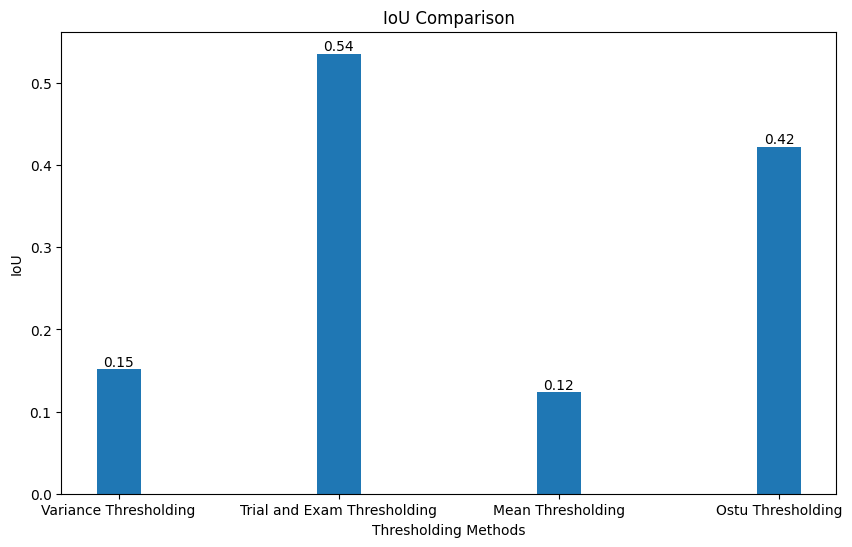

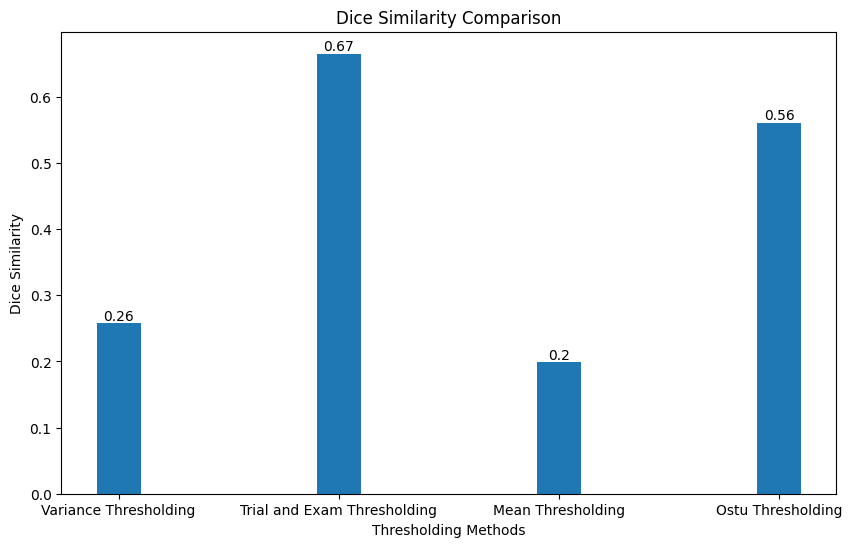

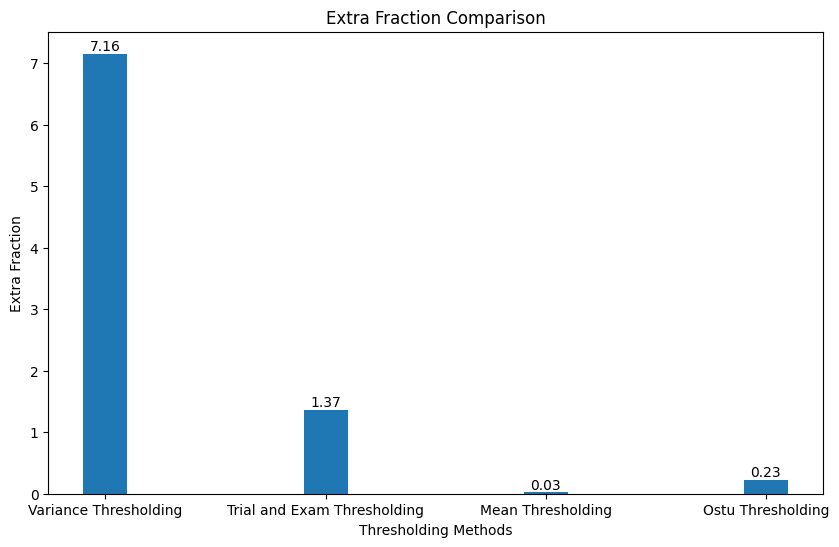

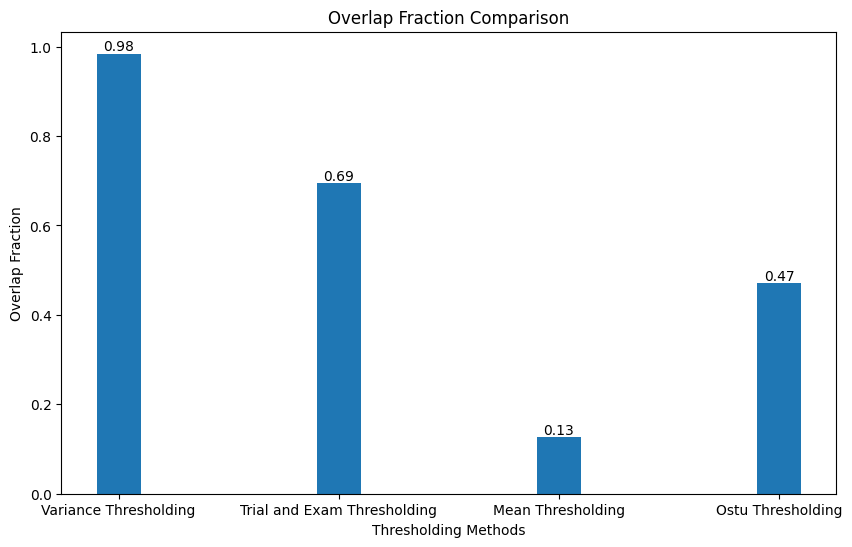

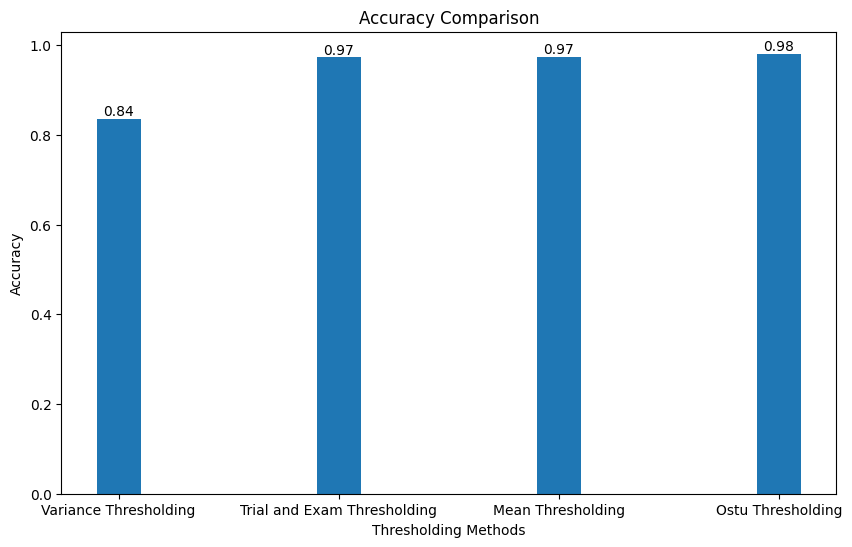

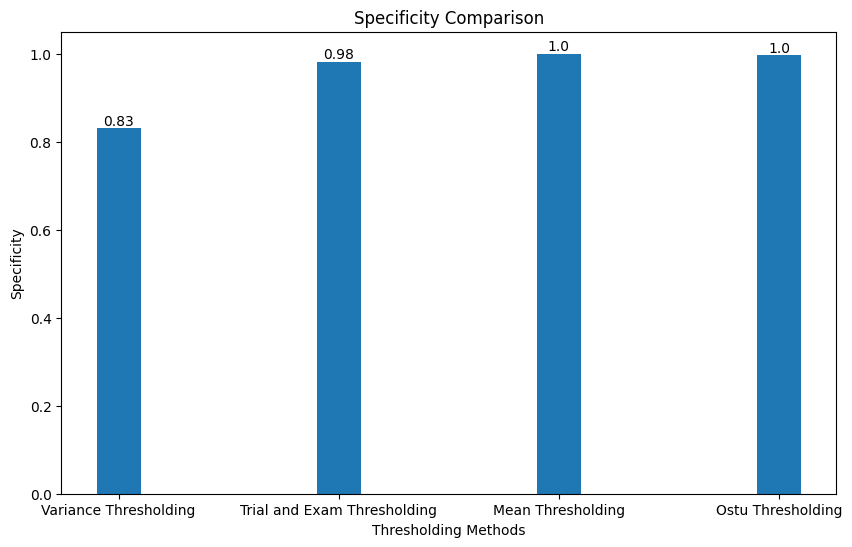

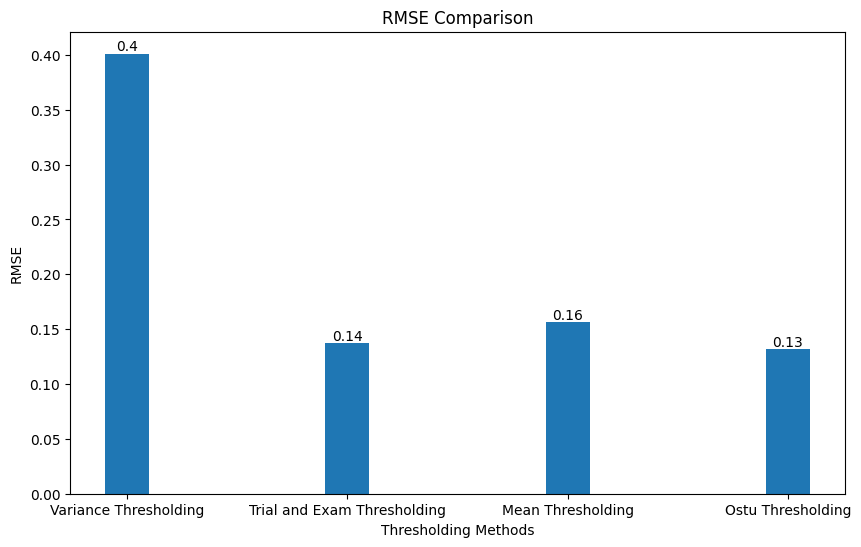

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Define the headers for both rows and columns
column_headers = ["IoU", "Dice Similarity", "Extra Fraction", "Overlap Fraction", "Accuracy", "Specificity", "RMSE"]
headers = ["Variance Thresholding", "Trial and Exam Thresholding", "Mean Thresholding", "Ostu Thresholding"]

# Create an empty DataFrame with specified headers for rows and columns
df = pd.DataFrame(columns=column_headers, index=headers)

# Fill each cell with zero
df.loc[:, :] = 0

def process_metrics(all_metrics):
    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(all_metrics)
    
    # Calculate the mean for each column
    mean_values = df.mean()
    
    # Create a new DataFrame for the mean values
    mean_df = pd.DataFrame({'Metric': mean_values.index, 'Mean': mean_values.values})
    
    # Transpose the DataFrame
    mean_df = mean_df.T
    
    # Display the mean DataFrame
    return mean_df

# List of metric sets (assuming these are defined somewhere in your code)
# metric_sets = [all_metrics_var, all_metrics_trial, all_metrics_mean, all_metrics_ostu]

# Process each set of metrics
for i, metrics in enumerate(metric_sets):
    mean_df = process_metrics(metrics)
    row_data = mean_df.loc["Mean"].values
    row_data = row_data.T
    # Print the data for the specific row
    df.iloc[i, :] = row_data

# Set a wider figure size
fig_width = 10  # Adjust the width as needed
fig_height = 6  # Adjust the height as needed

# Set a narrower width for the bars
bar_width = 0.2  # Adjust the width as needed

# Create the folder if it does not exist
output_folder = 'resulted_images'
os.makedirs(output_folder, exist_ok=True)

# Plot each metric as a bar graph and save images
for metric in column_headers:
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Extract the data for the current metric
    data = df[metric].values

    # Calculate the x positions for each group of bars
    x_positions = range(len(headers))

    # Plot the bars for each thresholding method with the specified width
    bars = ax.bar(x_positions, data, width=bar_width, align='center')

    # Add labels and title
    ax.set_ylabel(metric)
    ax.set_xlabel("Thresholding Methods")
    ax.set_title(f"{metric} Comparison")

    # Add data values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    # Set x-axis ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(headers)

    # Save the plot to the resulted_images folder
    output_path = os.path.join(output_folder, f"{metric.replace(' ', '_')}_Comparison.png")
    plt.savefig(output_path, bbox_inches='tight')

    # Show the plot (optional)
    plt.show()


https://medium.com/swlh/image-processing-with-python-image-segmentation-using-thresholding-methods-423ecdaf8ab4